In [37]:
# KUC, NLP

1. Why it works?

In [38]:
# import sms-spam.csv
import numpy as np
import pandas as pd

In [39]:
sms = pd.read_csv('sms-spam.csv',usecols= ['spam','text'])
print(sms.head())

   spam                                               text
0     0  Go until jurong point, crazy.. Available only ...
1     0                      Ok lar... Joking wif u oni...
2     1  Free entry in 2 a wkly comp to win FA Cup fina...
3     0  U dun say so early hor... U c already then say...
4     0  Nah I don't think he goes to usf, he lives aro...


In [40]:
index = ['sms{}{}'.format(i, '!'*j) for (i,j) in zip(range(len(sms)), sms.spam)]
print(index[:10])# <2>

['sms0', 'sms1', 'sms2!', 'sms3', 'sms4', 'sms5!', 'sms6', 'sms7', 'sms8!', 'sms9!']


In [41]:
mask = sms.spam.astype(bool).values


In [42]:
sms['spam'] = sms.spam.astype(int).values

print(sms.head())


   spam                                               text
0     0  Go until jurong point, crazy.. Available only ...
1     0                      Ok lar... Joking wif u oni...
2     1  Free entry in 2 a wkly comp to win FA Cup fina...
3     0  U dun say so early hor... U c already then say...
4     0  Nah I don't think he goes to usf, he lives aro...


---------------

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.casual import casual_tokenize

tfidf_model = TfidfVectorizer(tokenizer=casual_tokenize)
tfidf_docs = tfidf_model.fit_transform(raw_documents=sms.text).toarray()
print(tfidf_docs.shape)
print(type(tfidf_model.fit_transform(raw_documents=sms.text)))

(4837, 9232)
<class 'scipy.sparse.csr.csr_matrix'>


In [44]:
print(tfidf_model.get_feature_names()[:20])

['!', '"', '#', '#150', '#5000', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '. .', '. . .', '. . . .', '. . . . .']


/Users/hure002/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [45]:
print(tfidf_docs[:2])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [46]:
# Use LDA model in sklearn.discriminant_analysis.LinearDiscriminant- Analysis.
# Before applying, need to compute the centroids of binary class (spam and nonspam)
mask = sms.spam.astype(bool).values

spam_centroid = tfidf_docs[mask].mean(axis=0) # <2>
nonspam_centroid = tfidf_docs[~mask].mean(axis=0)
spamminess_score = tfidf_docs.dot(spam_centroid - nonspam_centroid)

In [47]:
print(spamminess_score)

[-0.01469806 -0.02007376  0.03856095 ... -0.01014774 -0.00344281
  0.00395752]


In [48]:
# Transform features by scaling each feature to a given range.
from sklearn.preprocessing import MinMaxScaler
sms['lda_score'] = MinMaxScaler().fit_transform(spamminess_score.reshape(-1,1))



In [49]:
print(sms['lda_score'])

0       0.227478
1       0.177888
2       0.718785
3       0.184565
4       0.286944
          ...   
4832    0.850649
4833    0.292753
4834    0.269454
4835    0.331306
4836    0.399573
Name: lda_score, Length: 4837, dtype: float64


In [50]:
sms['lda_predict'] = (sms.lda_score > .5).astype(int)




--------------

In [51]:
# output the results
sms['spam lda_predict lda_score'.split()].round(2).head(20)


,spam,lda_predict,lda_score
0,0,0,0.23
1,0,0,0.18
2,1,1,0.72
3,0,0,0.18
4,0,0,0.29
5,1,1,0.55
6,0,0,0.32
7,0,0,0.50
8,1,1,0.89
9,1,1,0.77


2. when it fails to work?

3. How to evaluate?

In [55]:
print(len(sms['spam'] ))

4837


In [20]:
acc = 0
# acc = # correctly predicted/ # total
# 97.74%

4837 109
0.022534628902212115
the accuracy is s%: 97.74653710977879


Task:
Implement the code to compute the accuracy of current TF-IDF + LDA

In [66]:
print('the prediction and real label for 1st sample are:')
number = (sms['lda_predict'] ==sms['spam']).sum()
print(number)
acc = number / len(sms)
print(acc)
print('the accuracy of our tf-idf + LDA scheme is %', acc*100)

the prediction and real label for 1st sample are:
4728
0.9774653710977879
the accuracy of our tf-idf + LDA scheme is % 97.74653710977879


In [ ]:
total = len(sms)
correct = (sms.spam - sms.lda_predict).abs().sum()
print(total, correct)
acc = (1 - correct/total ) * 100
print(correct/total)
print('the accuracy is s%:', acc)

4. How to show performance?

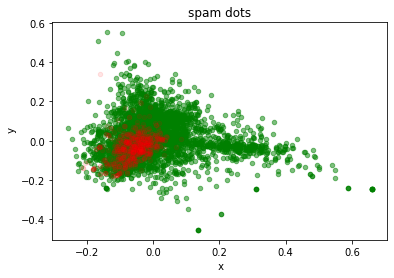

<Figure size 432x288 with 0 Axes>

In [69]:
# visualization
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

pca_model = PCA(n_components=3)

tfidf_docs_3d = pca_model.fit_transform(tfidf_docs)
df = pd.DataFrame(tfidf_docs_3d)
ax = df[~mask].plot(x=0, y=1, kind='scatter', alpha=.5, c='green',title='non spam dots')
df[mask].plot(x=0, y=1, ax=ax, alpha=.1, kind='scatter', c='red', title='spam dots')
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

plt.xlabel(' x')
plt.ylabel(' y')
plt.show()
plt.savefig('spam_lda_2d_scatter.png')



--------------- improvements?


In [ ]:
# 1. take confusion matrix into performance demonstration
# 2. take cross validation into consideration



In [22]:
# 2.
from sklearn import metrics
y_true = sms['spam']
y_pred = sms['lda_predict']
conf = metrics.confusion_matrix(y_true, y_pred)
print(conf)


[[4135   64]
 [  45  593]]


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_docs, y_true, test_size=0.15, random_state=42)


In [34]:
mask = y_train.astype(bool).values

spam_centroid = X_train[mask].mean(axis=0) # <2>
nonspam_centroid = X_train[~mask].mean(axis=0)
spamminess_score = X_train.dot(spam_centroid - nonspam_centroid)
y_pred = MinMaxScaler().fit_transform(spamminess_score.reshape(-1,1))
y_pred = (y_pred > .5).astype(int)

print(y_pred)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [1]]


In [35]:
test_spamminess_score = X_test.dot(spam_centroid - nonspam_centroid)
y_test_pred = MinMaxScaler().fit_transform(test_spamminess_score.reshape(-1,1))
y_test_pred = (y_test_pred > .5).astype(int)

In [36]:
conf = metrics.confusion_matrix(y_test, y_test_pred)
print(conf)



[[625   8]
 [ 13  80]]


In [70]:
(625+80)/(625+8+13+80)


0.9710743801652892